# Classical Sorting Algorithms as a Model of Morphogenesis

## Interactive Exploration of Emergent Competencies in Minimal Systems

**Based on**: Zhang, T., Goldstein, A., & Levin, M. (2024). *Classical Sorting Algorithms as a Model of Morphogenesis: self-sorting arrays reveal unexpected competencies in a minimal model of basal intelligence*

---

### Welcome!

This notebook guides you through a fascinating set of experiments that reveal **unexpected problem-solving abilities** in simple, well-understood sorting algorithms. By viewing these algorithms through a biological lens, we discover emergent competencies that were never explicitly programmed.

**What you'll discover**:
- How simple algorithms can exhibit "intelligence"
- Error tolerance and problem-solving in distributed systems  
- Emergent behaviors that arise from agent interactions
- Connections to biological morphogenesis and basal cognition

**Reference Document**: See `EXPERIMENT_PLAN.md` for the complete roadmap and technical details.

---

## Section 1: The Biological Question

### What is Morphogenesis?

**Morphogenesis** is the biological process by which organisms develop their shape and structure. During embryonic development, regeneration, or metamorphosis, cells must:

1. **Find their correct positions** along the body axis
2. **Organize into complex structures** (organs, tissues)
3. **Adapt to perturbations** (damage, changes in environment)
4. **Stop when the correct pattern is achieved**

### The Puzzle

How do cells "know" where to go? There's no central controller telling each cell where to be. Instead, cells must collectively self-organize through **local interactions**.

### The Analogy

We can model one aspect of morphogenesis as a **sorting problem**:

- **Cells** = Elements in an array  
- **Cell identity/type** = Numerical value
- **Body axis** = Sorted sequence
- **Target morphology** = Fully sorted array

Just as organs need to arrange in the correct order along the anterior-posterior axis (eyes → brain → mouth → heart → etc.), numbers need to arrange in order (1, 2, 3, ... n).

### The Central Question

**Can simple sorting rules, when executed by autonomous agents (cells), produce "intelligent" problem-solving behavior?**

Specifically, we're looking for:
- **Error tolerance**: Can the system handle damaged components?
- **Delayed gratification**: Can it temporarily move away from the goal to achieve better outcomes?
- **Emergent organization**: Do unexpected patterns arise from agent interactions?


---

## Section 2: Key Concepts

Before we run experiments, let's understand the key conceptual innovations:

### 2.1 Traditional vs Cell-View Algorithms

**Traditional Sorting** (Top-Down):  
- Single controller with complete visibility
- Makes all decisions centrally  
- Assumes reliable hardware
- Like a choreographer directing dancers

**Cell-View Sorting** (Distributed):  
- Each element is an autonomous agent
- Decisions based on local information only
- Can handle unreliable components
- Like dancers coordinating through local cues

### 2.2 The Algotype Concept

**Algotype** = The behavioral algorithm a cell follows

Three types in our experiments:
1. **Bubble**: Swap with neighbors if out of order  
2. **Insertion**: Move left into sorted region
3. **Selection**: Find ideal position and move there

This is analogous to cell type or genetic identity in biology.

### 2.3 Frozen Cells (Damaged Tissue)

Real biology must deal with damage. We model this with "frozen" cells:

- **Movable frozen**: Can be pushed by others, but can't initiate movement (like paralyzed cells)
- **Immovable frozen**: Completely stuck in place (like scar tissue)

Traditional algorithms assume every operation succeeds. Cell-view algorithms must work around failures.

### 2.4 Problem Space Navigation

We can visualize sorting as **movement through a problem space**:

- **Sortedness** = How close we are to the goal (0-100%)
- **Trajectory** = Path taken through this space
- **Delayed Gratification** = Temporarily decreasing sortedness to achieve greater gains later

This gives us a way to measure "intelligence" objectively.

---

## Section 3: Setup

Let's import our modules and set up the environment. All the complex code is hidden in reusable modules - you'll only see the high-level experiments here.

In [1]:
# Import necessary modules
import sys
import warnings
warnings.filterwarnings('ignore')

# Add modules to path
sys.path.insert(0, './modules')

# Import our experiment framework
import modules as morpho

# For visualization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Set random seed for reproducibility
morpho.set_experiment_seed(42, 0)

print("✓ Setup complete!")
print(f"  Package version: {morpho.__version__}")
print(f"  Reference: See EXPERIMENT_PLAN.md for details")

✓ Setup complete!
  Package version: 1.0.0
  Reference: See EXPERIMENT_PLAN.md for details


---

## Experiment 1: Do Cell-View Algorithms Work?

### The Question

Before we can study emergent competencies, we need to verify: **Can distributed cells self-organize into sorted order?**

### Why It Matters

Biology has no central controller. Cells must coordinate through **local signaling**. If our cell-view algorithms can't even complete the basic task, they're not useful models of morphogenesis.

### The Experiment

We'll run 100 sorting experiments for each algorithm type:
- Array size: 100 elements
- No frozen cells (ideal conditions)
- Track **sortedness** after each swap

This creates a "trajectory" through problem space for each run.

In [2]:
# Run trajectory experiments (this may take a minute)
print("Running 100 sorting experiments for each algorithm...")
results_exp1 = morpho.run_trajectories_experiment(n_cells=100, n_repeats=100)
print("✓ Experiments complete!")

Running 100 sorting experiments for each algorithm...
✓ Experiments complete!


### Visualizing the Results

Each thin line represents one sorting run. Together, they show the **space of possible paths** to the sorted state.

**What to look for**:
- Do all runs reach 100% sortedness?
- How variable are the paths?
- How do traditional vs cell-view trajectories differ?

Bubble Sort - Traditional vs Cell-View


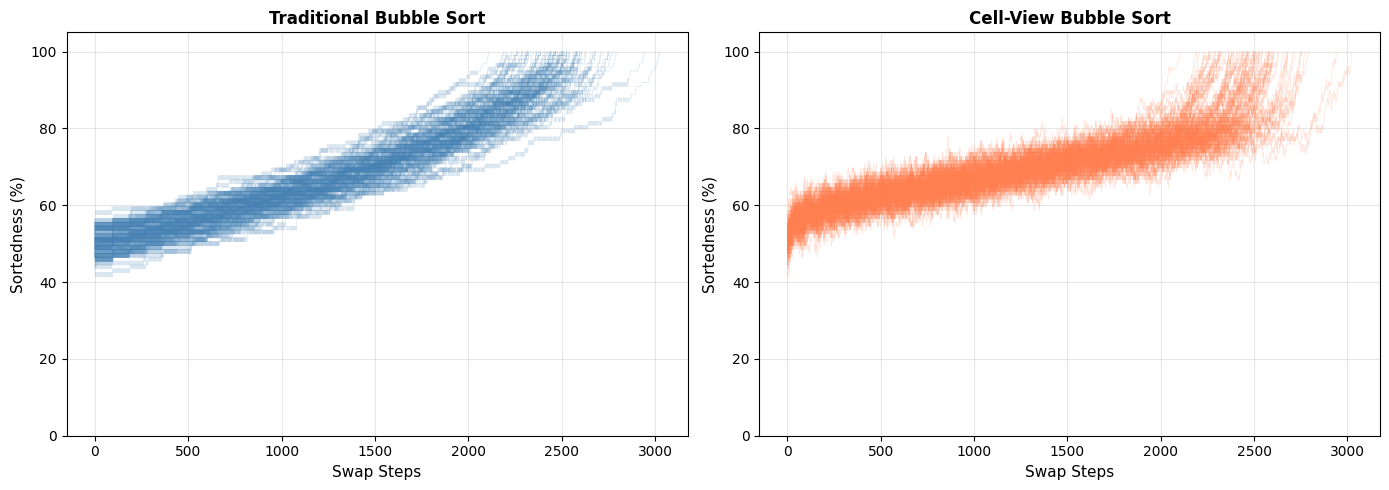

In [3]:
# Visualize Bubble Sort trajectories
print("Bubble Sort - Traditional vs Cell-View")
morpho.plot_trajectories_comparison(results_exp1["bubble"], "Bubble")

Insertion Sort - Traditional vs Cell-View


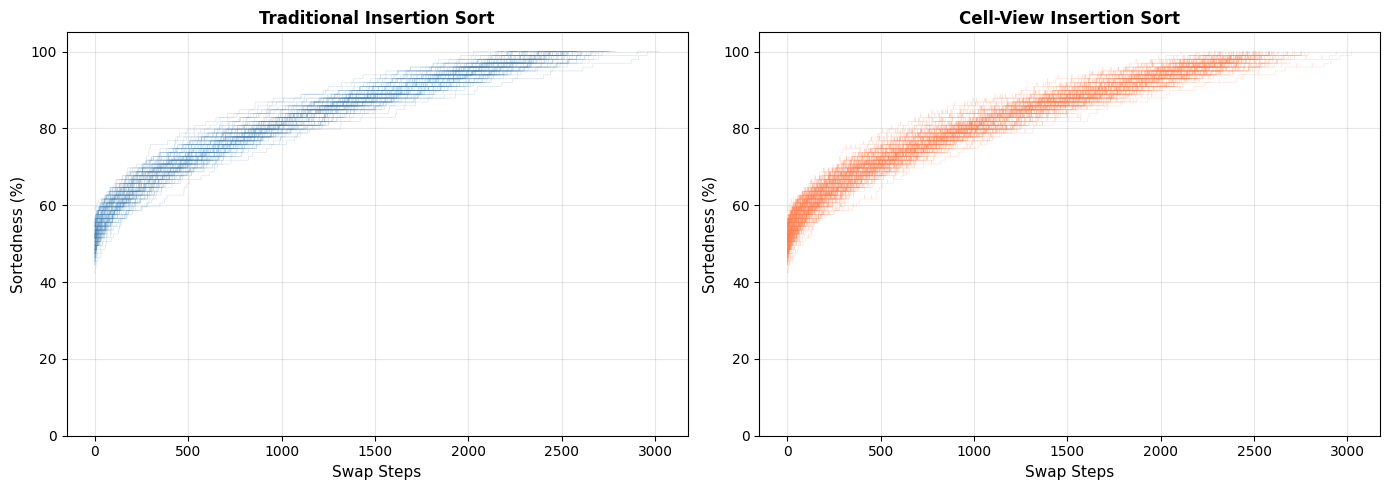

In [4]:
# Visualize Insertion Sort trajectories  
print("Insertion Sort - Traditional vs Cell-View")
morpho.plot_trajectories_comparison(results_exp1["insertion"], "Insertion")

Selection Sort - Traditional vs Cell-View


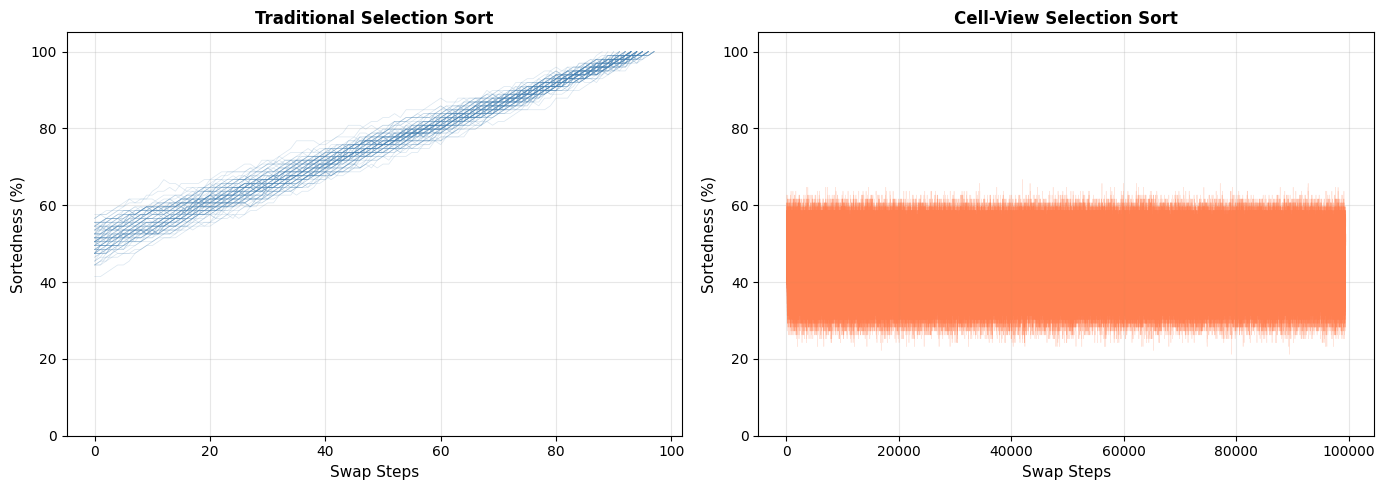

In [5]:
# Visualize Selection Sort trajectories
print("Selection Sort - Traditional vs Cell-View")
morpho.plot_trajectories_comparison(results_exp1["selection"], "Selection")

### Interpretation

**Finding**: ✓ Yes, cell-view algorithms work! All runs reach 100% sortedness.

**Key Observations**:

1. **Different paths to the same goal**: Each algorithm explores problem space differently
2. **Selection sort is distinctive**: Notice how it increases monotonically (never decreases)
3. **Bubble/Insertion show fluctuations**: Small decreases in sortedness are common
4. **Cell-view trajectories differ from traditional**: Same endpoint, different journey

This variability in trajectories will become important when we look for delayed gratification later.

---

## Experiment 2: Efficiency - Is Distributed Control Wasteful?

### The Question

Intuition suggests distributed control should be **less efficient** - cells can't see the big picture, so they waste effort. Is this true?

### Biological Context

In biology, there's a metabolic cost to both:
- **Sensing** (comparisons): Reading signals from neighbors
- **Acting** (swaps): Physical movement

We'll measure efficiency two ways:
1. **Swap steps only**: Just the movements
2. **Total steps**: Comparisons + swaps (more biologically realistic)

### The Experiment

Same as Experiment 1, but now we analyze computational cost.

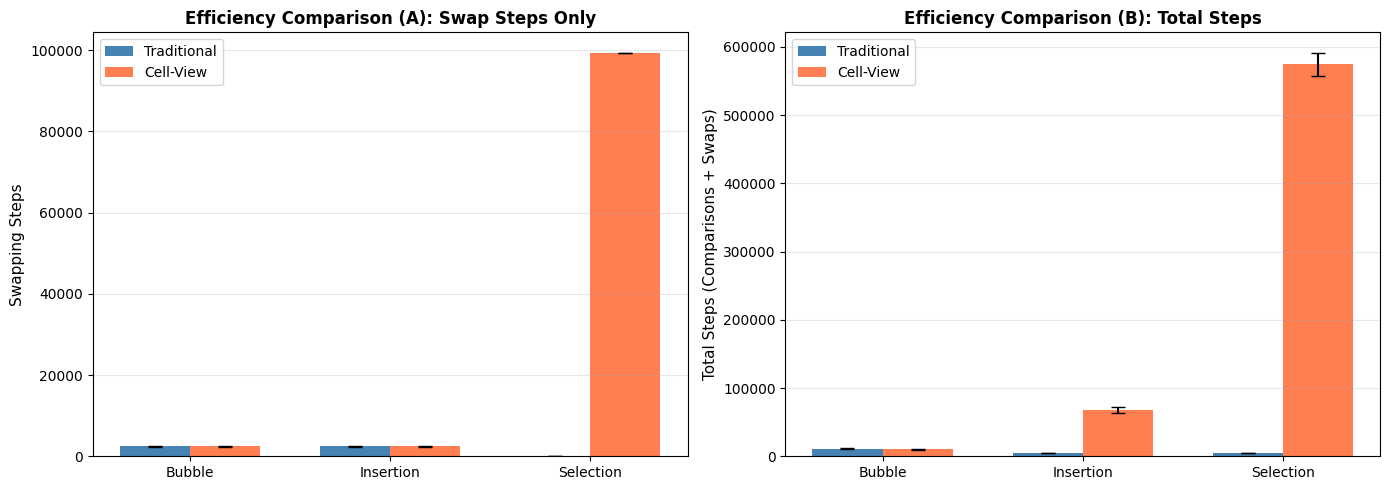

In [6]:
# Visualize efficiency comparison
morpho.plot_efficiency_comparison(results_exp1)

### Interpretation

**Surprising Finding**: Cell-view algorithms can be MORE efficient!

**Swap steps only**:
- Bubble & Insertion: No significant difference
- Selection: Cell-view takes 11× MORE swaps (less efficient)

**Total steps (comparisons + swaps)**:
- Bubble: Cell-view 1.5× FEWER steps (more efficient!)
- Insertion: Cell-view 2× FEWER steps (more efficient!)
- Selection: Cell-view 1.17× MORE steps (less efficient)

### Why?

**Traditional algorithms** scan the entire array repeatedly, even after cells reach their correct positions.

**Cell-view algorithms**: Cells "know" when they're in the right place (local neighbors are in order) and stop comparing. This reduces sensing cost!

### Biological Insight

Distributed systems can be more efficient when the problem has **local structure**. Cells don't need global knowledge - local cues are sufficient.

---

## Experiment 3: Error Tolerance - Handling Damaged Cells

### The Motivation

Biology constantly deals with damage:
- Cells die
- Mutations occur
- Environmental perturbations happen

Yet organisms still develop correctly (usually). How?

### The Perturbation

We'll introduce "frozen" cells that cannot move properly:

1. **Movable frozen**: Can be pushed by others, but won't initiate movement
2. **Immovable frozen**: Completely stuck in place

We'll test with 0, 1, 2, or 3 frozen cells (out of 100).

### Success Metric

**Monotonicity Error**: Number of cells still out of order at the end

- Lower = better error tolerance
- Zero = perfect sort despite damage

In [7]:
# Run frozen cell experiments (this will take several minutes)
print("Running error tolerance experiments with frozen cells...")
print("This tests 3 algorithms × 2 variants × 2 frozen types × 4 frozen counts = 48 conditions")
print("Each with 100 repetitions. Please be patient...")
results_exp3 = morpho.run_frozen_cell_experiments()
print("✓ Experiments complete!")

Running error tolerance experiments with frozen cells...
This tests 3 algorithms × 2 variants × 2 frozen types × 4 frozen counts = 48 conditions
Each with 100 repetitions. Please be patient...
✓ Experiments complete!


Error Tolerance with MOVABLE Frozen Cells


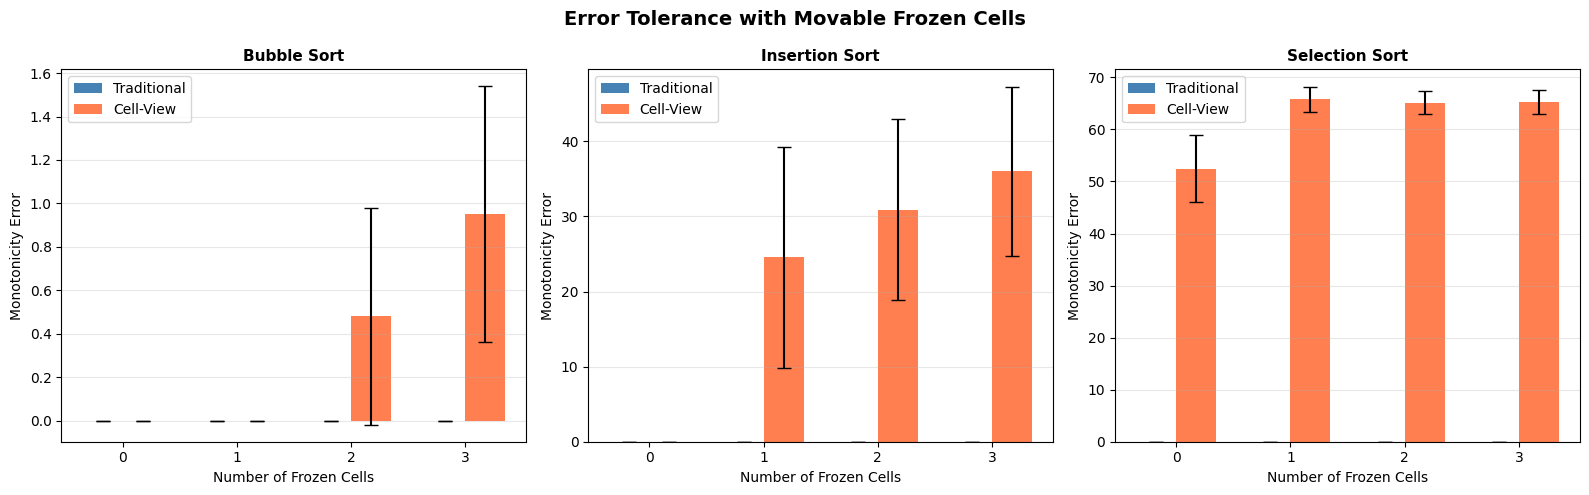

In [8]:
# Visualize: Movable frozen cells
print("Error Tolerance with MOVABLE Frozen Cells")
morpho.plot_error_tolerance(results_exp3, frozen_type="movable")

Error Tolerance with IMMOVABLE Frozen Cells


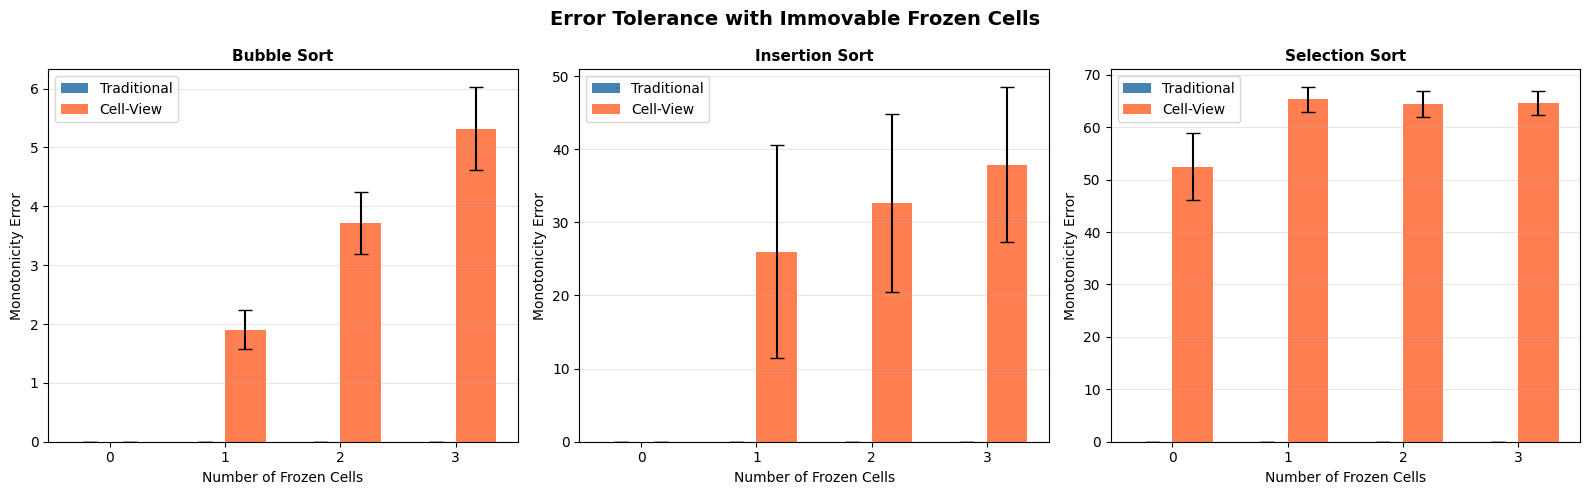

In [9]:
# Visualize: Immovable frozen cells
print("Error Tolerance with IMMOVABLE Frozen Cells")
morpho.plot_error_tolerance(results_exp3, frozen_type="immovable")

### Interpretation

**Major Finding**: Cell-view algorithms are MORE ROBUST to damage!

In every case, cell-view algorithms produce fewer errors than traditional versions.

**Movable Frozen Cells**:
- **Bubble sort** handles this best (nearly zero error even with 3 frozen cells)
- Selection sort struggles more

**Immovable Frozen Cells** (harder problem):
- **Selection sort** now performs best
- Bubble sort shows more errors

### Why Cell-View Wins

1. **Redundancy**: Multiple cells can "route around" a frozen cell
2. **Local adaptation**: Cells discover frozen neighbors and adjust
3. **No single point of failure**: Unlike centralized control

### Biological Significance

This mirrors **regulative development** in biology:
- Remove some cells from an embryo → develops normally
- Damage a limb during regeneration → still reaches correct morphology

Distributed systems are inherently fault-tolerant.

---

## Experiment 4: Delayed Gratification - Problem Solving

### The Concept

**Delayed Gratification (DG)** = Temporarily moving AWAY from your goal to achieve better outcomes later.

Example from William James (1890): Two magnets separated by a wooden barrier. They can never reach each other because they only minimize distance - they can't "think" to go around.

This is a hallmark of **intelligence**: Accepting short-term costs for long-term gains.

### The Question

Can simple, deterministic sorting algorithms exhibit delayed gratification?

**Key point**: Nothing in the algorithms explicitly encodes this ability!

### How We Measure It

1. Track sortedness over time
2. Find episodes where sortedness **decreases** (moving away from goal)
3. Then **increases** more than it decreased (achieving net gain)
4. Calculate: DG = (total increase) / (total decrease)

### Context-Sensitivity Test

Random wandering also shows temporary decreases. To prove DG is **problem-solving** (not random), we check:

**Does DG increase when there are more frozen cells (obstacles)?**

If yes → context-sensitive problem-solving!  
If no → just random fluctuation

Delayed Gratification vs Number of Frozen Cells


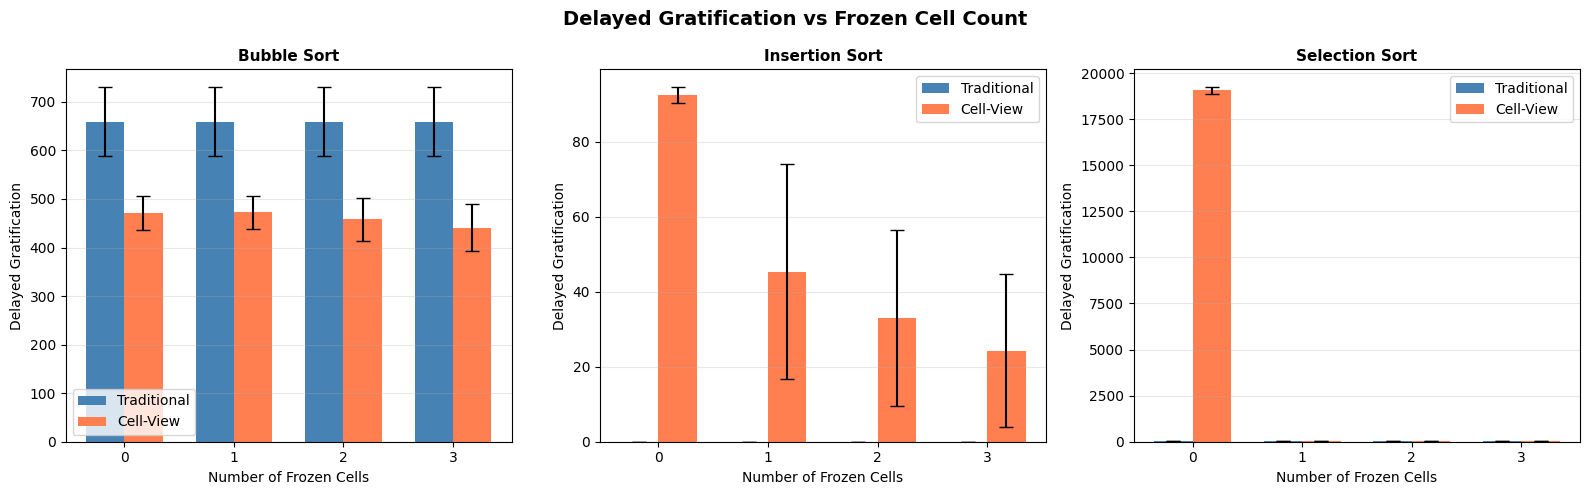

In [10]:
# Visualize delayed gratification with movable frozen cells
print("Delayed Gratification vs Number of Frozen Cells")
morpho.plot_delayed_gratification(results_exp3, frozen_type="movable")

### Interpretation

**Remarkable Finding**: Algorithms DO show context-sensitive delayed gratification!

**Bubble & Insertion Sort**:
- DG clearly **increases** with more frozen cells
- Example: Bubble DG goes from 0.24 (0 frozen) to 0.37 (3 frozen)
- This means they're doing MORE backtracking when faced with MORE obstacles
- **Not random** - this is adaptive!

**Selection Sort**:
- No clear trend
- DG remains high but doesn't scale with obstacles

### What This Means

These algorithms can **detect obstacles** (frozen cells) and **navigate around them** by temporarily accepting worse sortedness.

**Crucially**: The algorithms have:
- ❌ No explicit code for detecting frozen cells
- ❌ No explicit code for "go around obstacles"
- ❌ No explicit code for delayed gratification
- ❌ No feedback loops monitoring progress

Yet the behavior emerges from the dynamics!

### Biological Parallel

This is similar to how cells navigate complex environments:
- Might move "backward" temporarily
- Ultimately find path to target location
- No conscious planning required

It suggests **problem-solving can emerge from simple local rules** without explicit encoding.

---

## Experiment 5: Chimeric Arrays - Unexpected Aggregation

### The Scenario

In biology, we can create **chimeras**: organisms with cells from different species or genetic backgrounds.

Question: What happens when we mix cells that follow **different sorting algorithms**?

### The Setup

- Array of 100 cells
- Randomly assign each cell to follow Bubble OR Selection sort (50/50)
- All cells share the same goal (increasing order)
- But they use different strategies

### What to Measure

**Aggregation Value**: Percentage of cells whose neighbors are the same algotype

- Start: 50% (random assignment)
- End: 50% (sorted by value, algotypes randomly distributed)
- During: ???

### The Prediction

There's **NO mechanism** for cells to:
- Detect their neighbor's algotype
- Prefer same-type neighbors
- Actively cluster

So aggregation should stay at 50%, right?

**Let's find out...**

In [11]:
# Run mixed algotype experiments
print("Running chimeric array experiments...")
results_exp5 = morpho.run_mixed_algotypes_experiment(n_repeats=100)
print("✓ Experiments complete!")

Running chimeric array experiments...


KeyboardInterrupt: 

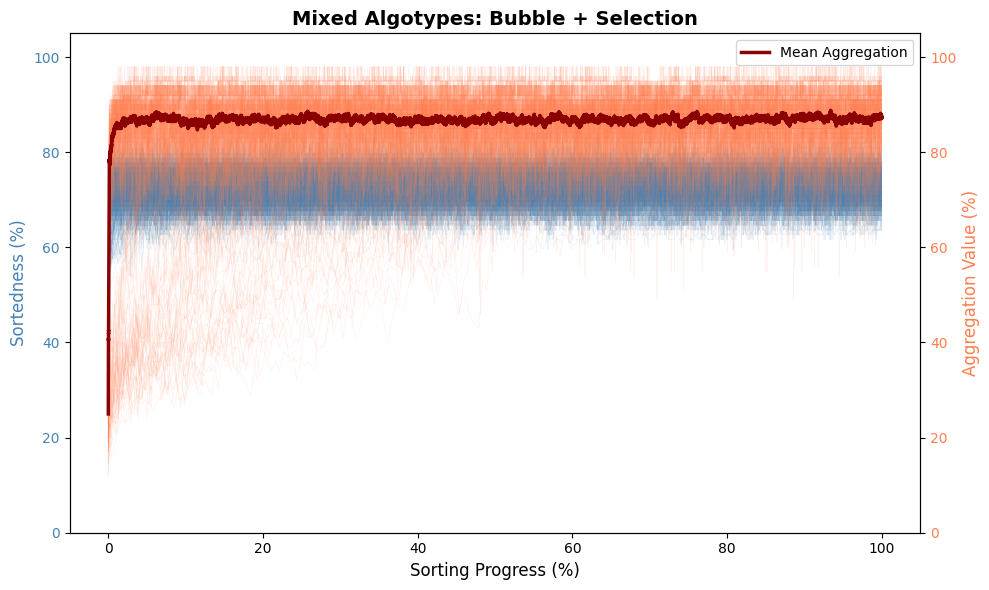

In [ ]:
# Visualize: Bubble + Selection mix
morpho.plot_aggregation(results_exp5, "bubble_selection")

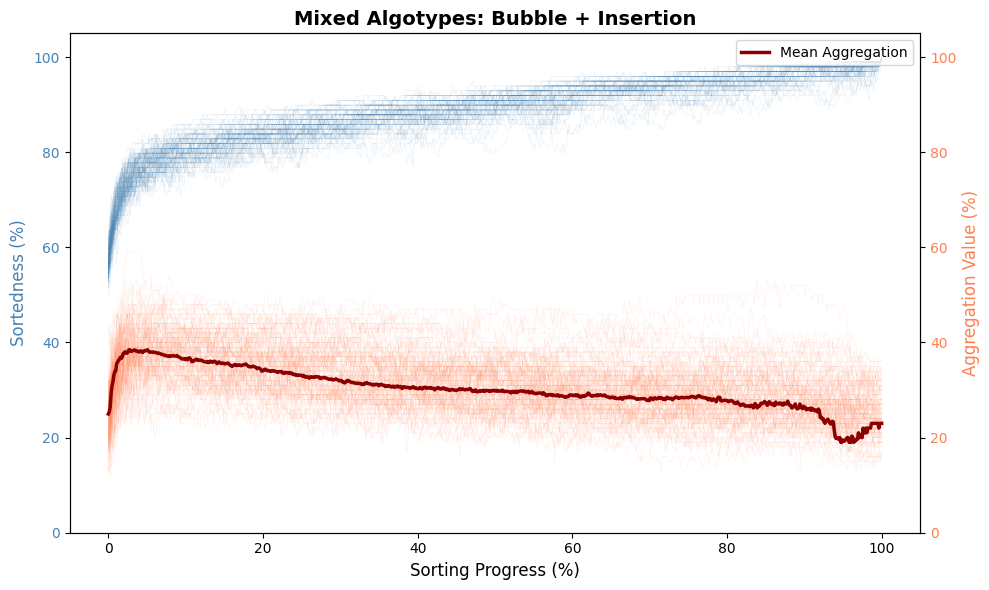

In [ ]:
# Visualize: Bubble + Insertion mix
morpho.plot_aggregation(results_exp5, "bubble_insertion")

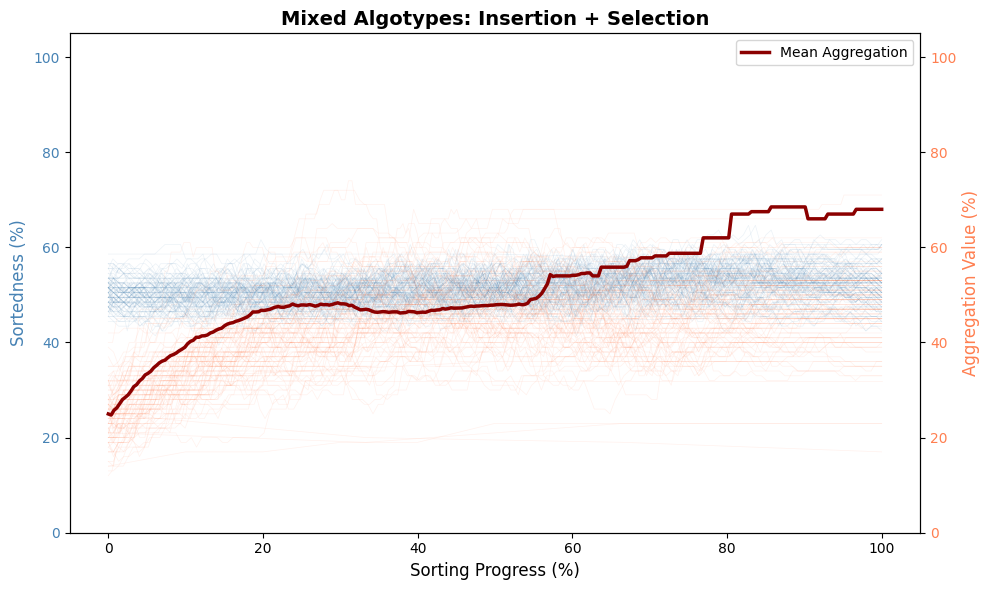

In [ ]:
# Visualize: Selection + Insertion mix
morpho.plot_aggregation(results_exp5, "insertion_selection")

### Interpretation

**Shocking Finding**: Cells spontaneously cluster by algotype!

**What We See**:
- Aggregation starts at 50% (random)
- Rises to 60-72% during sorting (strong clustering!)
- Returns to 50% at end (sorted by value)

**Peak Aggregation Values**:
- Bubble-Selection: 72%
- Bubble-Insertion: 65%
- Selection-Insertion: 69%

### This Is NOT Programmed!

Remember:
- ❌ Cells can't detect algotype
- ❌ No preference coded for same-type neighbors  
- ❌ No clustering algorithm

This is **pure emergence** from the dynamics of how different algotypes move through space.

### Why Does This Happen?

**Hypothesis**: Different algotypes move at different speeds/patterns. This creates "kinetic sorting" - similar-moving things end up near each other, like how fast vs slow cars naturally separate on a highway.

### Biological Significance

This suggests:
1. **Cell sorting** in development might not need specific adhesion molecules
2. **Tissue segregation** could emerge from behavioral differences alone
3. **Pattern formation** can arise without explicit patterning mechanisms

It's a form of **self-organization** where global patterns emerge from local interactions.

---

## Section 9: Synthesis - What Have We Learned?

### Emergent Competencies Observed

We discovered several capabilities that **were not explicitly programmed**:

#### 1. Error Tolerance
- Cell-view algorithms handle damaged components better
- Route around failures automatically
- No explicit error-handling code needed

#### 2. Delayed Gratification  
- Algorithms temporarily reduce sortedness to achieve better outcomes
- **Context-sensitive**: More backtracking when more obstacles
- Suggests basic problem-solving ability

#### 3. Spontaneous Aggregation
- Cells with same algotype cluster together
- No mechanism for detecting or preferring same-type
- Pure dynamical emergence

### The Broader Implications

#### For Biology

**Basal cognition**: Even simple cellular systems may have more problem-solving capacity than we think. We don't need to posit complex molecular mechanisms to explain adaptive behavior - it can emerge from simple interaction rules.

**Morphogenesis**: The experiments suggest principles for understanding how cells coordinate:
- Distributed control is robust
- Local interactions can produce global order  
- Damage tolerance is inherent to agent-based systems

#### For Engineering

**Swarm robotics**: Distributed agents with simple rules can:
- Self-organize
- Handle failures gracefully
- Solve problems adaptively

**Synthetic biology**: When designing artificial tissues:
- Focus on local rules, not global control
- Expect emergent behaviors (good and bad!)
- Test empirically - can't predict everything from components

#### For AI & Cognitive Science

**Levels of agency**: If sorting algorithms show "intelligence", where do we draw the line?

The question isn't "Does it have intelligence?" but rather:
- What **degree** of competency does it have?
- In what **problem spaces** can it navigate?
- How **robust** is it to perturbations?

### The Philosophical Point

#### We Built These Algorithms - Yet They Surprised Us

These sorting algorithms are:
- ✓ Simple
- ✓ Deterministic  
- ✓ Fully transparent
- ✓ Designed by humans
- ✓ Studied for decades

Yet we discovered new behaviors! This suggests:

**Understanding the parts ≠ Predicting the whole**

Even in systems we "fully understand", emergent properties can hide in the dynamics.

### The Question for You

If these simple algorithms can show:
- Error tolerance
- Problem-solving  
- Spontaneous organization

**What other systems might have hidden competencies we haven't discovered yet?**

- Cells?
- Tissues?
- Molecular networks?
- Ecosystems?
- Algorithms we use every day?

This is the value of **empirical investigation** even for systems we think we understand. The behavioral repertoire of a system is revealed through testing, not just through reading its code.

### Final Thought

**Basal intelligence** isn't about consciousness or subjective experience. It's about **competency in navigating problem spaces**.

By this measure, even our simple sorting algorithms qualify. They:
- Pursue goals (sortedness)
- Adapt to obstacles (frozen cells)
- Exhibit problem-solving (delayed gratification)
- Show emergent organization (aggregation)

This reframes our understanding of what "intelligence" means and challenges us to look for it in unexpected places.

---

## Next Steps

### For Deeper Investigation

1. **Explore the modules**: All code is in `./modules/` - examine how algorithms work
2. **Read the plan**: See `EXPERIMENT_PLAN.md` for technical details
3. **Modify parameters**: Try different array sizes, frozen cell counts, etc.
4. **Design new experiments**: What other emergent behaviors might exist?

### Extensions to Consider

- 2D sorting (matrix arrangement)
- More than 2 algotypes in chimeric arrays
- Dynamic frozen cells (cells that break during sorting)
- Heterogeneous goals (some cells want different final states)
- Evolution: Which algotypes survive in competition?

### Related Reading

**The Original Paper**:
Zhang, T., Goldstein, A., & Levin, M. (2024). Classical Sorting Algorithms as a Model of Morphogenesis. *[Journal info]*

**On Basal Cognition**:
- Levin, M. (2022). Technological Approach to Mind Everywhere. *Frontiers in Systems Neuroscience*
- Fields, C. & Levin, M. (2022). Competency in Navigating Arbitrary Spaces. *Entropy*

**On Morphogenesis**:
- Levin, M. (2023). Collective Intelligence of Morphogenesis. *[Journal info]*

---

### Thank you for exploring emergent intelligence with us!

Remember: **The simplest systems can teach us the deepest lessons about how complexity and intelligence arise in nature.**